In [11]:
import numpy as np
import pandas as pd
from scipy.special import softmax
from scipy.stats import pointbiserialr
from ast import literal_eval
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")
sns.set_context(context='paper',font_scale=1.2)
sns.despine()

import yaml
import os
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [12]:
model_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/models/clmbr'
results_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/results'
figure_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/notebooks/figures'

In [38]:
tv_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_1000_lr_1e-5_temp_0.01_pool_trivial/train_preds.csv')
tv_df.head()

,epoch,preds,labels
0,0,90.698330,1.0
1,0,21.948498,0.0
2,0,90.701996,1.0
3,0,12.944078,0.0
4,0,94.694090,1.0


In [48]:
rd_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_1000_lr_3e-5_temp_0.01_pool_rand_day/train_preds.csv')
rd_df.head()

,epoch,preds,labels
0,0,87.411446,1.0
1,0,6.711030,0.0
2,0,35.538740,0.0
3,0,10.494595,0.0
4,0,22.318153,0.0


In [52]:
dp_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_2000_lr_1e-5_temp_0.01_pool_diff_pat/train_preds.csv')
dp_df.head()

,epoch,preds,labels
0,0,85.373100,1.0
1,0,12.856348,0.0
2,0,18.913063,0.0
3,0,23.110601,0.0
4,0,16.379093,0.0


In [50]:
mr_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_1000_lr_3e-5_temp_0.01_pool_mean_rep/train_preds.csv')
mr_df.head()

,epoch,preds,labels
0,0,98.253470,1.0
1,0,24.721708,0.0
2,0,41.061886,0.0
3,0,38.873024,0.0
4,0,36.116350,0.0


In [34]:
ocp_df = pd.read_csv(f'{model_path}/ocp/models/gru_sz_800_do_0.1_l2_0.1_lr_1e-5_pool_ocp/train_preds.csv')

[0.9694492139875458, 0.9867723685603775, 0.9983893873775603, 0.998607225714991, 0.9986735446970757, 0.9986935654966701, 0.9988368052560168, 0.998858241290786, 0.9988776086248786, 0.9989950042786884, 0.9990055891456511, 0.9990732831963212, 0.9990549493327848, 0.9990620239917924, 0.999159044506311, 0.9991846039265988, 0.9991846112075516, 0.9991585015292659, 0.9992449127856302, 0.9992004810753564]


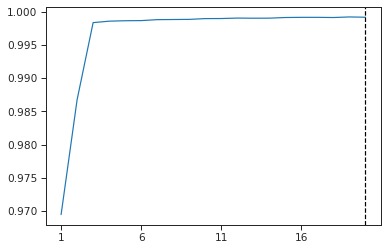

In [53]:
epochs = list(tv_df['epoch'].unique())
auroc = []
for e in epochs:
    df = tv_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)
plt.xticks(list(np.arange(1, len(epochs)+1, 5)))
plt.axvline(x=20, ls='--', color='black')
plt.savefig('figures/trivial_train_auroc.png',bbox_inches='tight')
print(auroc)

[0.9652885010316188, 0.9410169442305594, 0.9412634516775167, 0.9421172083096918, 0.9425970429696167, 0.9440177391654913, 0.9429625573668148, 0.9433528515831666, 0.944699740940295, 0.944447830694499, 0.943616553823257, 0.9439997243653174, 0.9460795538981908, 0.9474575164434028, 0.9470099831310327, 0.9452863080342183, 0.9471436264195885, 0.9470185544233116, 0.9448008276133022, 0.9476308478693795, 0.9471537521195292, 0.9482473978199465, 0.9476873971995234, 0.9489658624024295, 0.9502478447034478]


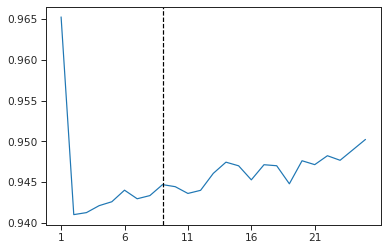

In [57]:
epochs = list(rd_df['epoch'].unique())
auroc = []
for e in epochs:
    df = rd_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)
plt.xticks(list(np.arange(1, len(epochs)+1, 5)))
plt.axvline(x=9, ls='--', color='black')
plt.savefig('figures/rand_day_train_auroc.png',bbox_inches='tight')
print(auroc)

[0.9664662209962074, 0.9728286238523036, 0.9725641482096965, 0.972161605953052, 0.9715126763064929, 0.9704575307688494, 0.9711227986692528, 0.9704618531952056, 0.9710614962973063, 0.9697143293891559, 0.9697823338308411, 0.969053608696073, 0.9692570840557807, 0.9688399134318546, 0.9691293382821213, 0.9687256258372487, 0.969452680394649, 0.969324209958101, 0.9679141376025542, 0.9679734985652355, 0.9679623639822615, 0.9677915667152904, 0.9687069509476622, 0.9688400565511373, 0.9678283510126788, 0.9673926756276695, 0.9683683795232572, 0.9679130208621504, 0.9684614248306546, 0.9677688749543665, 0.9676344821861085, 0.9676944985133729, 0.9676804861380774, 0.9678557071476839, 0.9680657602670861, 0.9679615285984746]


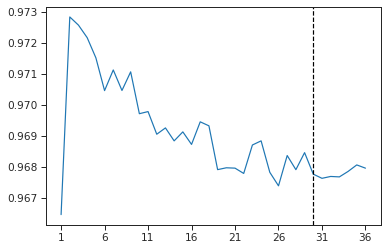

In [55]:
epochs = list(dp_df['epoch'].unique())
auroc = []
for e in epochs:
    df = dp_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)
plt.xticks(list(np.arange(1, len(epochs)+1, 5)))
plt.axvline(x=30, ls='--', color='black')
plt.savefig('figures/diff_pat_train_auroc.png',bbox_inches='tight')
print(auroc)

[0.9998331775428588, 0.9999324831147913, 0.9999418210192741, 0.9999410732699437, 0.999951384900198, 0.9999565141026394, 0.999957037922157, 0.999963043850618, 0.999964667204885, 0.9999646104859061, 0.9999705479109812, 0.9999711653409298, 0.99996833229899, 0.9999759085518846, 0.9999753827769897, 0.9999757933410518, 0.9999815081398987, 0.9999796849721395, 0.9999807695678061, 0.9999732110306302, 0.999980092381526, 0.9999800309044625, 0.9999780738324631, 0.9999798430448436, 0.9999801162240937, 0.9999814157678732, 0.9999837842121573, 0.9999827595292523, 0.999985605528826, 0.9999874041891892, 0.9999832442933664, 0.9999824438400988, 0.9999819938165222, 0.99998349111413, 0.9999849890635303, 0.9999873827843253, 0.9999854538045803]


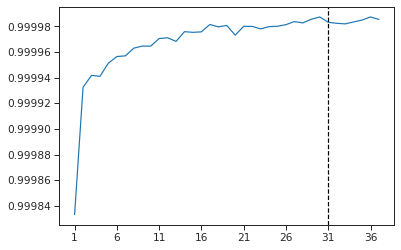

In [56]:
epochs = list(mr_df['epoch'].unique())
auroc = []
for e in epochs:
    df = mr_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)
plt.xticks(list(np.arange(1, len(epochs)+1, 5)))
plt.axvline(x=31, ls='--', color='black')
plt.savefig('figures/mean_rep_train_auroc.png',bbox_inches='tight')
print(auroc)

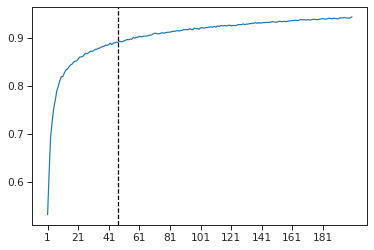

In [35]:
epochs = list(ocp_df['epoch'].unique())
auroc = []
for e in epochs:
    df = ocp_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)
plt.axvline(x=47, ls='--', color='black')
plt.xticks(list(np.arange(1, 201, 20)))
plt.savefig('figures/ocp_train_auroc.png',bbox_inches='tight')